In [35]:
import pandas as pd

In [36]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [37]:
file = r'crypto_adj_close.csv'
data = pd.read_csv(file, index_col="Date", parse_dates=True)

In [38]:
# drop the USDS33039-USD and SUI20947-USD

data = data.drop(columns=['USDS33039-USD', 'SUI20947-USD'])

# drop the NaN values
data = data.dropna()

In [39]:
# remove the -USD from the column names
data.columns = [col.split('-')[0] for col in data.columns]

In [40]:
mu = expected_returns.mean_historical_return(data)
s = risk_models.sample_cov(data)

# **MAX SHARPE**

In [41]:
ef = EfficientFrontier(mu, s)

In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from pypfopt import plotting


# fig, ax = plt.subplots()
# plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, show_fig=False)

# # Customize the plot
# ax.set_title('Efficient Frontier')
# ax.set_xlabel('Volatility (Standard Deviation)')
# ax.set_ylabel('Expected Return')

# plt.show()

In [43]:
max_sharpe = ef.max_sharpe()

In [44]:
cleaned_weights_max_sharpe = ef.clean_weights()

In [45]:
for i in cleaned_weights_max_sharpe:
    if cleaned_weights_max_sharpe[i] > 0:
        print(i, cleaned_weights_max_sharpe[i])

XRP 0.11191
TRX 0.01658
WBTC 0.1228
WTRX 0.34284
LEO 0.40587


In [46]:
ef.portfolio_performance(verbose=True)

Expected annual return: 24.2%
Annual volatility: 34.7%
Sharpe Ratio: 0.64


(0.24165496391900657, 0.34653183671782173, 0.6396380950691655)

# **MAX SHARPE CFDS**

In [47]:
efshort = EfficientFrontier(mu, s, weight_bounds=(-1, 1))

In [48]:
msshort = efshort.max_sharpe()

In [49]:
cleaned_weights_max_return = efshort.clean_weights()

In [50]:
for i in cleaned_weights_max_return:
    if cleaned_weights_max_return[i] != 0:
         print(f"{i}: {cleaned_weights_max_return[i] * 10:.2f}%")

BTC: 10.00%
ETH: -10.00%
USDT: -10.00%
BNB: 5.92%
USDC: 0.98%
XRP: 4.98%
ADA: -1.06%
SOL: 2.79%
DOGE: 0.78%
TRX: 4.42%
TON: -0.10%
MATIC: -8.96%
DOT: -8.41%
LTC: 0.14%
AVAX: -6.15%
WBTC: 9.35%
DAI: 2.32%
WTRX: 0.49%
STETH: -8.38%
LINK: 5.65%
LEO: 5.15%
XLM: 1.40%
WSTETH: 10.00%
HBAR: -0.02%
SHIB: -1.07%
BCH: -0.23%


In [51]:
efshort.portfolio_performance(verbose=True)

Expected annual return: 170.3%
Annual volatility: 91.8%
Sharpe Ratio: 1.83


(1.7033595924458536, 0.9180735827852979, 1.8335780747974386)

In [52]:
expected_returns.mean_historical_return(data)

BTC       0.191210
ETH      -0.071960
USDT     -0.000038
BNB       0.100072
USDC      0.000126
XRP       0.296621
ADA      -0.035058
SOL       0.092991
DOGE      0.077762
TRX       0.346152
TON      -0.676532
MATIC    -0.357271
DOT      -0.277611
LTC      -0.031190
AVAX     -0.272962
WBTC      0.190502
DAI       0.000008
WTRX      0.346955
STETH    -0.069369
LINK      0.005320
LEO       0.148760
XLM       0.105456
WSTETH   -0.046067
HBAR     -0.016156
SHIB     -0.143476
BCH       0.026983
dtype: float64

In [53]:
expected_returns.ema_historical_return(data)

BTC       4.551838e-01
ETH      -1.693706e-01
USDT      1.721549e-04
BNB       2.721693e-01
USDC     -2.044667e-05
XRP       2.581936e+00
ADA       1.167739e+00
SOL       4.294270e-01
DOGE      5.100242e-01
TRX       9.597711e-01
TON       2.019992e+14
MATIC    -4.573855e-01
DOT      -8.407014e-02
LTC       3.546279e-01
AVAX     -7.134438e-02
WBTC      4.484231e-01
DAI       1.866456e-04
WTRX      9.578420e-01
STETH    -1.668386e-01
LINK      3.931137e-01
LEO       6.270057e-01
XLM       1.508514e+00
WSTETH   -1.534320e-01
HBAR      2.146957e+00
SHIB      1.584486e-01
BCH       2.633261e-01
Name: 2025-03-14 00:00:00+00:00, dtype: float64

In [54]:
expected_returns.capm_return(data)

BTC       0.309454
ETH       0.399035
USDT      0.021113
BNB       0.303095
USDC      0.020708
XRP       0.414104
ADA       0.486831
SOL       0.539407
DOGE      0.464082
TRX       0.252332
TON       5.144528
MATIC     0.512425
DOT       0.446940
LTC       0.401031
AVAX      0.516089
WBTC      0.308291
DAI       0.021901
WTRX      0.247274
STETH     0.393692
LINK      0.492368
LEO       0.092288
XLM       0.415283
WSTETH    0.392768
HBAR      0.488391
SHIB      0.457828
BCH       0.422956
Name: mkt, dtype: float64

In [55]:
returns = data.pct_change()
returns.dropna(inplace=True)
returns

,BTC,ETH,USDT,BNB,USDC,XRP,ADA,SOL,DOGE,TRX,...,DAI,WTRX,STETH,LINK,LEO,XLM,WSTETH,HBAR,SHIB,BCH
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-06 00:00:00+00:00,-0.024888,-0.041201,-0.000031,-0.025624,0.000480,-0.038291,-0.048425,-0.056952,-0.033841,-0.024955,...,-0.000607,-0.023859,-0.033461,-0.048790,0.005541,-0.037385,-0.038261,-0.037419,-0.040000,-0.037067
2022-03-07 00:00:00+00:00,-0.009317,-0.022413,-0.000121,0.016889,-0.000717,-0.003729,-0.032016,-0.028532,-0.030315,-0.004073,...,0.000386,-0.006598,-0.022828,-0.046889,0.001628,-0.016808,-0.024038,0.019885,-0.041667,-0.028782
2022-03-08 00:00:00+00:00,0.017740,0.031619,0.000159,0.001610,0.001127,-0.003194,0.004855,0.001518,-0.000649,0.031765,...,0.000482,0.037411,0.032480,0.028695,0.048545,0.014860,0.030616,-0.008975,0.000000,0.034316
2022-03-09 00:00:00+00:00,0.083786,0.059391,0.000012,0.030362,0.000190,0.064162,0.059960,0.072303,0.038956,0.004906,...,-0.000102,-0.001465,0.059472,0.071755,0.028761,0.092713,0.058346,0.039275,0.043478,0.084324
2022-03-10 00:00:00+00:00,-0.060631,-0.044595,0.000271,-0.054368,-0.000649,-0.038803,-0.050603,-0.059670,-0.038680,-0.015976,...,-0.000064,-0.013599,-0.045051,-0.058517,-0.000382,-0.052829,-0.041665,0.017212,-0.041667,-0.059934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10 00:00:00+00:00,-0.025670,-0.076585,-0.000053,-0.040496,0.000190,-0.054475,-0.066031,-0.064410,-0.081900,-0.010444,...,0.000149,-0.024228,-0.072323,-0.078432,0.001391,-0.077883,-0.067245,-0.049350,0.000000,-0.071616
2025-03-11 00:00:00+00:00,0.055139,0.031536,0.000096,0.036369,-0.000111,0.073637,0.074324,0.058941,0.065598,-0.022049,...,-0.000042,-0.021530,0.025051,0.032044,0.013864,0.052509,0.026613,0.033637,0.000000,0.023659
2025-03-12 00:00:00+00:00,0.010380,-0.005658,-0.000089,0.033402,-0.000165,0.034076,0.017793,0.010532,0.050041,-0.006376,...,0.000005,-0.010217,-0.006228,0.029198,-0.017567,0.017896,-0.012436,0.026317,0.000000,0.042611


## PUEDO HACER UN PLOT DE LOS QUE SON MUCHOS DONDE SE VEN LAS DISTRIBUCIONES DE LOS RETURNS

# SE PUEDE HACER UNA ANIMACION QUE SEA POR MES DE MUCHOS PLOTS

In [56]:
from pypfopt import risk_models

In [57]:
risk_models.risk_matrix(data)

,BTC,ETH,USDT,BNB,USDC,XRP,ADA,SOL,DOGE,TRX,...,DAI,WTRX,STETH,LINK,LEO,XLM,WSTETH,HBAR,SHIB,BCH
BTC,0.195914,0.210279,0.000635,0.149846,0.000366,0.179176,0.230599,0.269606,0.243708,0.098142,...,0.001006,0.096395,0.207350,0.219697,0.035229,0.173434,0.205837,0.208837,0.215823,0.211304
ETH,0.210279,0.318553,0.000687,0.193583,0.000222,0.236907,0.301989,0.339850,0.299068,0.122446,...,0.001036,0.119147,0.315091,0.299006,0.041755,0.228741,0.313697,0.267390,0.265619,0.261399
USDT,0.000635,0.000687,0.000041,0.000517,-0.000036,0.000538,0.000849,0.001032,0.000995,0.000341,...,-0.000032,0.000332,0.000668,0.000676,0.000239,0.000652,0.000668,0.000735,0.000940,0.000787
BNB,0.149846,0.193583,0.000517,0.230874,0.000269,0.167447,0.215157,0.256523,0.218462,0.128629,...,0.001035,0.126275,0.190410,0.216227,0.030908,0.172363,0.188687,0.205123,0.193577,0.196465
USDC,0.000366,0.000222,-0.000036,0.000269,0.000302,0.000105,0.000622,0.000541,0.000319,0.000395,...,0.000271,0.000492,0.000202,0.000350,-0.000044,0.000102,0.000234,0.000326,0.000451,0.000207
XRP,0.179176,0.236907,0.000538,0.167447,0.000105,0.561552,0.392645,0.337830,0.295586,0.137036,...,0.001122,0.133026,0.233292,0.314159,0.042714,0.453382,0.233206,0.343126,0.266350,0.236967
ADA,0.230599,0.301989,0.000849,0.215157,0.000622,0.392645,0.588431,0.431040,0.381109,0.166059,...,0.001682,0.163503,0.297806,0.397011,0.037808,0.372638,0.297483,0.365003,0.350952,0.304470
SOL,0.269606,0.339850,0.001032,0.256523,0.000541,0.337830,0.431040,0.710266,0.389901,0.184730,...,0.001776,0.179369,0.333561,0.406892,0.050757,0.322795,0.333428,0.381360,0.371838,0.329208
DOGE,0.243708,0.299068,0.000995,0.218462,0.000319,0.295586,0.381109,0.389901,0.625318,0.141609,...,0.001136,0.135501,0.293548,0.337539,0.049305,0.290903,0.291796,0.319008,0.462271,0.325050
TRX,0.098142,0.122446,0.000341,0.128629,0.000395,0.137036,0.166059,0.184730,0.141609,0.400752,...,0.000826,0.392221,0.120667,0.148137,0.020518,0.144860,0.122169,0.172272,0.147434,0.146053


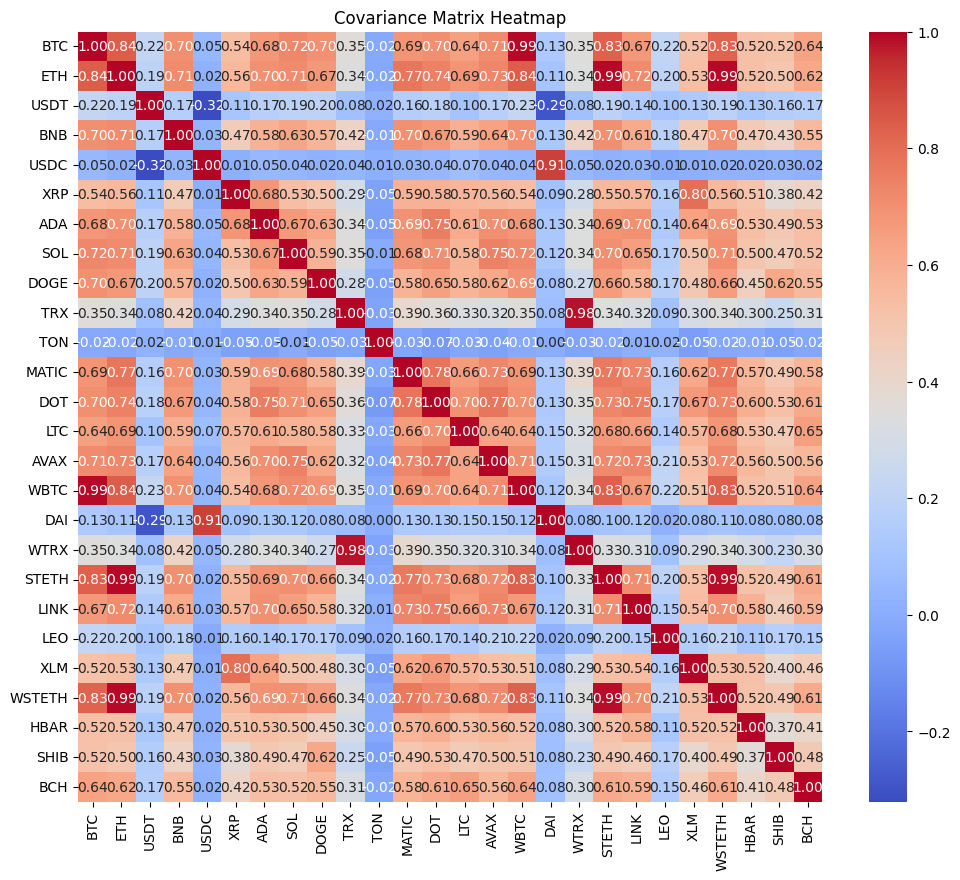

In [58]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(risk_models.cov_to_corr(s), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix Heatmap')
plt.show()

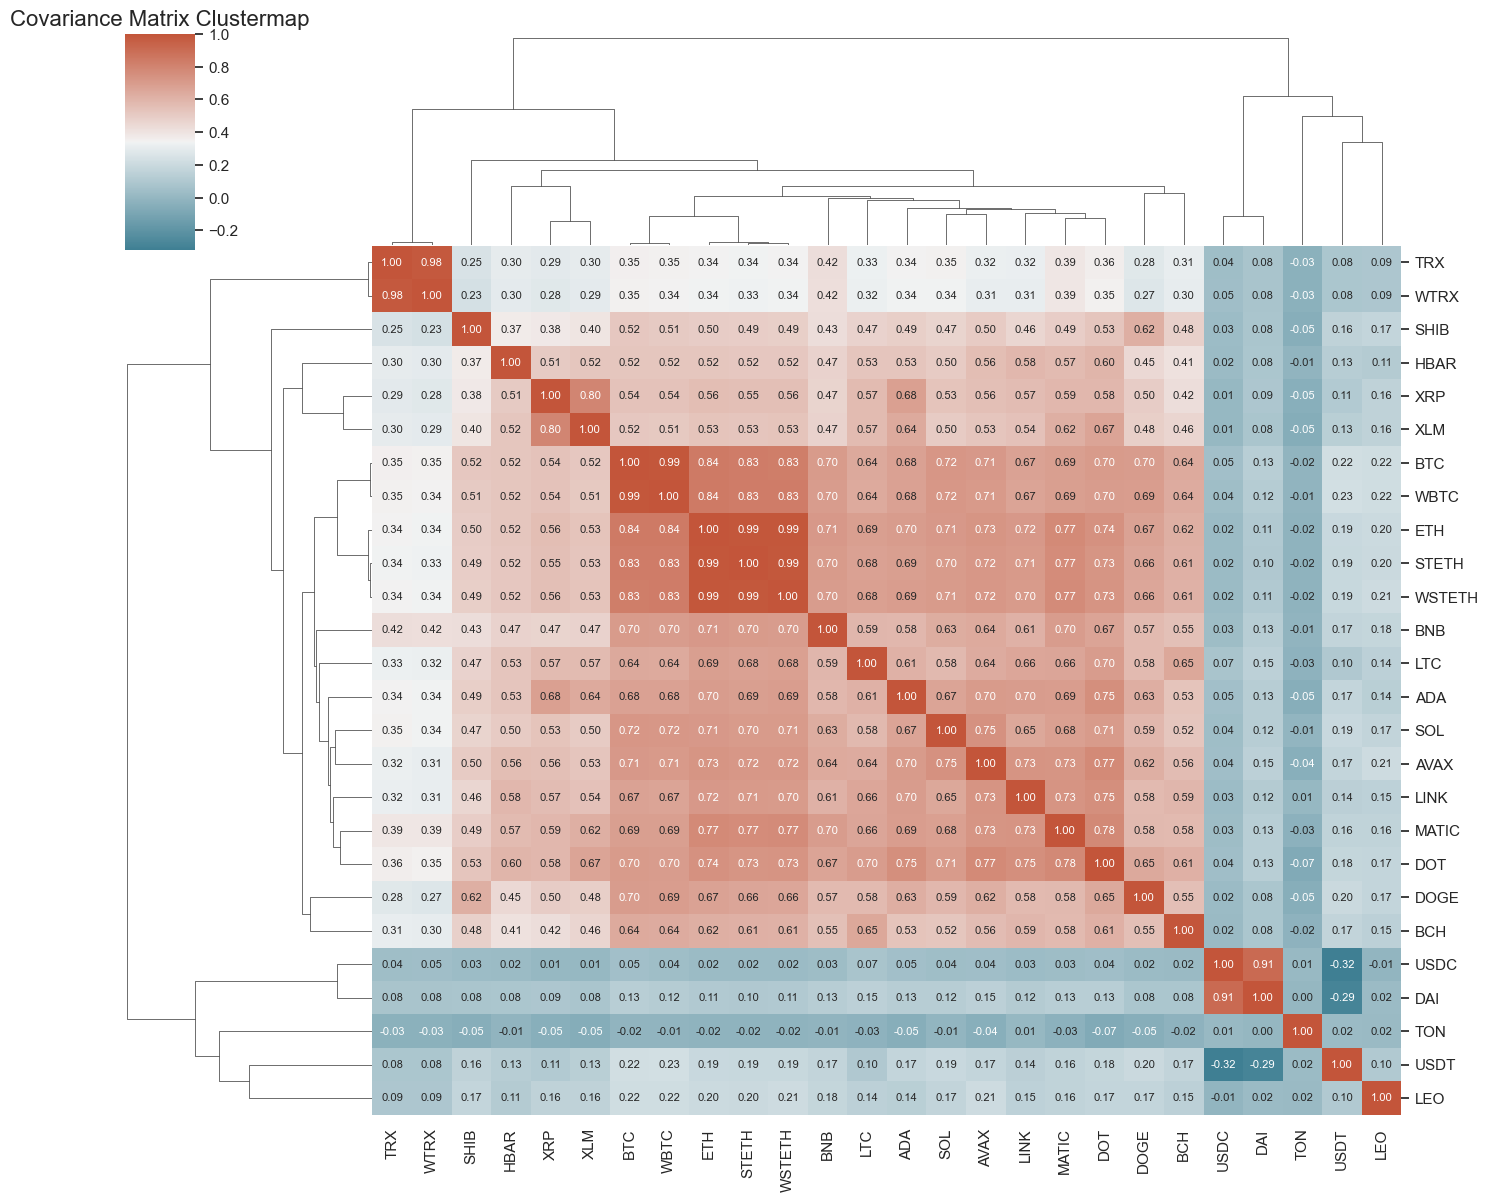

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set(style="whitegrid")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the clustermap with smaller annotation font size
g = sns.clustermap(risk_models.cov_to_corr(s), annot=True, cmap=cmap, fmt='.2f', figsize=(14, 12), annot_kws={"size": 8})

# Customize the plot
plt.title('Covariance Matrix Clustermap', fontsize=16)

plt.show()


# **MAX RETURN CFDS**

In [60]:
mrs = EfficientFrontier(mu, s, weight_bounds=(-1, 1))

In [61]:
mrsw = mrs.max_quadratic_utility()

In [62]:
mrscw = mrs.clean_weights() # Max Returs Short Clean Weights

In [63]:
for i in mrscw:
    if mrscw[i] != 0:
         print(f"{i}: {mrscw[i] * 10:.2f}%")

BTC: 10.00%
ETH: -10.00%
USDT: -10.00%
BNB: 9.76%
USDC: 4.64%
XRP: 10.00%
ADA: -3.48%
SOL: 5.09%
DOGE: 3.10%
TRX: 7.03%
TON: -0.16%
MATIC: -10.00%
DOT: -10.00%
LTC: -1.40%
AVAX: -10.00%
WBTC: 10.00%
DAI: -10.00%
WTRX: 2.63%
STETH: -10.00%
LINK: 7.40%
LEO: 10.00%
XLM: 0.47%
WSTETH: 7.84%
HBAR: -0.53%
SHIB: -2.86%
BCH: 0.49%


In [64]:
mrs.portfolio_performance(verbose=True)

Expected annual return: 242.3%
Annual volatility: 135.4%
Sharpe Ratio: 1.77


(2.423315930924079, 1.3540263714826977, 1.7749402681813198)